<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Sebastian, I’m <b>Victor Camargo</b> (https://hub.tripleten.com/u/e9cc9c11). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!

  <b>Nice work on:</b><br>
  ✔️ Thorough preprocessing and thoughtful handling of missing values<br>
  ✔️ Clear visual and statistical EDA, including anomaly and outlier detection<br>
  ✔️ Building and evaluating multiple models with proper validation and metric use<br>
  ✔️ Communicating your results with clear insights and business context<br><br>

   Your project is well-structured, and all core tasks were completed with attention to detail. Excellent use of sMAPE for evaluation, clean feature engineering, and solid model comparisons. Well done preparing this for real-world use.  

  ✅ Your project is approved — congratulations and good luck with your next one!<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  Please make sure all cells run smoothly from top to bottom and produce outputs before submitting. Also, try not to move, change, or delete reviewer comments, as they help us follow your progress and support you better.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


 
## Project Overview: Integrated Project 2
The company specializes in industrial optimization and data from a gold mining operation has been provided. The goal of the project is to build a machine learning model that predicts the amounts of gold recovered at different stages of the process using this data. 


## 1. Environment Setup and Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization and analisis 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
display(test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [5]:
display(full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


## Data Preparation

In [6]:
#Inspecting the general information of all 3 datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [9]:
#Checking for missing values in the train dataset
train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [10]:
#Checking for missing values in the needed columns from the train data set
missing_percentage = (train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].isnull().sum()
                      / len(train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']])) * 100
print(missing_percentage)

rougher.input.feed_au             0.492289
rougher.output.concentrate_au     0.486358
rougher.output.tail_au           13.339265
dtype: float64


In [11]:
#Find the median of the values in the columns with missing values
print(train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].median().round(2))

rougher.input.feed_au             7.44
rougher.output.concentrate_au    19.64
rougher.output.tail_au            1.75
dtype: float64


In [12]:
#Replace the missing values with the median
train['rougher.input.feed_au'].fillna(7.44, inplace=True)
train['rougher.output.concentrate_au'].fillna(19.64, inplace=True)
train['rougher.output.tail_au'].fillna(1.75, inplace=True)

In [13]:
# Verify
train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].isnull().sum()

rougher.input.feed_au            0
rougher.output.concentrate_au    0
rougher.output.tail_au           0
dtype: int64

In [14]:
#Checking for duplicates in all 3 datasets 
train.duplicated().sum()

0

In [15]:
test.duplicated().sum()

0

In [16]:
full.duplicated().sum()

0

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job identifying missing values in key columns and replacing them with the median — a solid and commonly used approach. You also verified the fix properly with a follow-up check. Well done keeping your data clean and consistent.
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion:  
  While using the median is valid and avoids distortion from outliers, you might consider forward-filling (`ffill()`). Since the data is indexed by time, using temporal imputation can preserve trends and make better use of the sequential structure. This could potentially lead to more realistic values for modeling.
</div>


## 1.2. Recovery Calculation 

In [17]:
train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']].head()

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au
0,6.486150,19.793808,1.170244
1,6.478583,20.050975,1.184827
2,6.362222,19.737170,1.162562
3,6.118189,19.320810,1.079755
4,5.663707,19.216101,1.012642


In [18]:
F = train['rougher.input.feed_au']
C = train['rougher.output.concentrate_au']
T = train['rougher.output.tail_au']

In [19]:
# Calculate Recovery 
recovery = (C * (F - T)) / (F * (C - T)) * 100 
print(recovery.round(2))

0        87.11
1        86.84
2        86.84
3        87.23
4        86.69
         ...  
16855    89.57
16856    87.72
16857    88.89
16858    89.86
16859    89.51
Length: 16860, dtype: float64


In [20]:
# Check your calculated recovery
print(f"Number of NaN values in calculated recovery: {recovery.isna().sum()}")
print(f"Number of inf values in calculated recovery: {np.isinf(recovery).sum()}")
print(f"Total length of recovery series: {len(recovery)}")

Number of NaN values in calculated recovery: 1115
Number of inf values in calculated recovery: 44
Total length of recovery series: 16860


In [21]:
# Calculate MAE and compare it with the recovery values.
(recovery - train['rougher.output.recovery']).abs().mean()

9.303415616264301e-15

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work recalculating the `rougher.output.recovery` using the provided formula and comparing it with the original values. Your MAE is effectively zero, confirming that the formula was applied correctly and that the column in the dataset is consistent with it. Great attention to detail and validation!
</div>


### 1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [23]:
# Compare the columns
train_columns = set(train.columns)
test_columns = set(test.columns)

# Find features in training but not in test
missing_in_test = train_columns - test_columns

print(f"Features in training set: {len(train_columns)}")
print(f"Features in test set: {len(test_columns)}")
print(f"Features missing in test set: {len(missing_in_test)}")

Features in training set: 87
Features in test set: 53
Features missing in test set: 34


In [24]:
# Find what these parameters are and their types. 
print("Missing features in test set:")
for feature in missing_in_test:
    print(f"{feature}: {train[feature].dtype}")

Missing features in test set:
final.output.concentrate_sol: float64
primary_cleaner.output.tail_pb: float64
final.output.tail_pb: float64
rougher.output.tail_pb: float64
primary_cleaner.output.concentrate_sol: float64
rougher.output.tail_sol: float64
final.output.tail_au: float64
primary_cleaner.output.concentrate_ag: float64
rougher.calculation.floatbank11_sulfate_to_au_feed: float64
secondary_cleaner.output.tail_ag: float64
rougher.calculation.au_pb_ratio: float64
rougher.output.tail_au: float64
rougher.output.recovery: float64
final.output.tail_sol: float64
primary_cleaner.output.tail_au: float64
rougher.output.concentrate_ag: float64
secondary_cleaner.output.tail_au: float64
final.output.recovery: float64
final.output.concentrate_pb: float64
rougher.output.concentrate_sol: float64
final.output.tail_ag: float64
rougher.output.concentrate_pb: float64
rougher.output.tail_ag: float64
primary_cleaner.output.concentrate_au: float64
primary_cleaner.output.tail_ag: float64
secondary_cleane

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>

In the analysis of the features not available in the test set, I identified 34 parameters that are present in the training set but missing from the test set. These features primarily represent various output measurements from different stages of the gold recovery process, such as concentrate and tail measurements for silver (Ag), gold (Au), and lead (Pb). All these parameters are of type float64, indicating they are numerical values.

The absence of these features in the test set suggests that the test data focuses on input parameters and initial conditions rather than intermediate or final output measurements. This distinction is crucial for model training and evaluation, as it highlights the need to rely on input features for predictions rather than output metrics that are not available in the test phase.
    
</div>

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Well done identifying the features that are present in the training set but missing from the test set. Your analysis is spot on — these are mostly output parameters not available during prediction time. Your explanation clearly shows an understanding of the modeling process and the importance of relying only on available input features for test-time predictions.
</div>


### 1.4. Perform data preprocessing.

In [25]:
#Checking for missing values in the test and full datasets 
test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [26]:
full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [27]:
# Calculate the % of missing values in each column of the test dataset
missing_percentage_test = (test.isnull().sum()
                      / len(test)) * 100
print(missing_percentage_test)

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [28]:
#Find the median of the values in the columns with missing values
print(test[['rougher.input.feed_au',
           'rougher.input.feed_ag',
           'rougher.input.feed_pb',]].median().round(2))

rougher.input.feed_au    9.45
rougher.input.feed_ag    9.63
rougher.input.feed_pb    3.68
dtype: float64


In [29]:
#Replace the missing values with the median
test['rougher.input.feed_au'].fillna(9.45, inplace=True)
test['rougher.input.feed_ag'].fillna(9.63, inplace=True)
test['rougher.input.feed_pb'].fillna(3.68, inplace=True)

In [30]:
# Verify
test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].isnull().sum()

rougher.input.feed_au    0
rougher.input.feed_ag    0
rougher.input.feed_pb    0
dtype: int64

In [31]:
# Calculate the % of missing values in each column of the full dataset
missing_percentage_full = (full.isnull().sum()
                      / len(full)) * 100
print(missing_percentage_full.to_string())

date                                                   0.000000
final.output.concentrate_ag                            0.391794
final.output.concentrate_pb                            0.382990
final.output.concentrate_sol                           1.694841
final.output.concentrate_au                            0.378588
final.output.recovery                                  8.641486
final.output.tail_ag                                   0.365381
final.output.tail_pb                                   0.880437
final.output.tail_sol                                  1.192992
final.output.tail_au                                   0.356577
primary_cleaner.input.sulfate                          7.083113
primary_cleaner.input.depressant                       6.805776
primary_cleaner.input.feed_size                        0.000000
primary_cleaner.input.xanthate                         5.066913
primary_cleaner.output.concentrate_ag                  0.431414
primary_cleaner.output.concentrate_pb   

In [32]:
#Find the median of the values in the columns with missing values
print(full[['primary_cleaner.output.concentrate_ag',
           'primary_cleaner.output.concentrate_pb',
           'primary_cleaner.output.concentrate_au',
           'final.output.concentrate_ag',
           'final.output.concentrate_pb',
           'final.output.concentrate_au',
           'rougher.output.concentrate_ag',
           'rougher.output.concentrate_pb',
           'rougher.output.concentrate_au',]].median().round(2))

primary_cleaner.output.concentrate_ag     8.27
primary_cleaner.output.concentrate_pb     9.92
primary_cleaner.output.concentrate_au    32.36
final.output.concentrate_ag               4.95
final.output.concentrate_pb               9.91
final.output.concentrate_au              44.65
rougher.output.concentrate_ag            11.79
rougher.output.concentrate_pb             7.57
rougher.output.concentrate_au            20.00
dtype: float64


In [33]:
#Replace the missing values with the median
full['primary_cleaner.output.concentrate_ag'].fillna(8.27, inplace=True)
full['primary_cleaner.output.concentrate_pb'].fillna(9.92, inplace=True)
full['primary_cleaner.output.concentrate_au'].fillna(32.36, inplace=True)
full['final.output.concentrate_ag'].fillna(4.95, inplace=True)
full['final.output.concentrate_pb'].fillna(9.91, inplace=True)
full['final.output.concentrate_au'].fillna(44.65, inplace=True)
full['rougher.output.concentrate_ag'].fillna(11.79, inplace=True)
full['rougher.output.concentrate_pb'].fillna(7.57, inplace=True)
full['rougher.output.concentrate_au'].fillna(20.00, inplace=True)

In [34]:
# Verify
full[['primary_cleaner.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_ag',
      'final.output.concentrate_pb',
      'final.output.concentrate_au',
      'rougher.output.concentrate_ag',
      'rougher.output.concentrate_pb',
      'rougher.output.concentrate_au']].isnull().sum()

primary_cleaner.output.concentrate_ag    0
primary_cleaner.output.concentrate_pb    0
primary_cleaner.output.concentrate_au    0
final.output.concentrate_ag              0
final.output.concentrate_pb              0
final.output.concentrate_au              0
rougher.output.concentrate_ag            0
rougher.output.concentrate_pb            0
rougher.output.concentrate_au            0
dtype: int64

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job identifying and imputing missing values in both the test and full datasets. You correctly calculated the percentage of missing data, used median values to fill them, and verified that all NaNs were handled afterward. Your process is clear, consistent, and reproducible — excellent work!
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion:  
  While median imputation is a safe and effective choice, consider experimenting with other strategies that better reflect the time-dependent nature of the process (e.g., `ffill()`, `bfill()`). This might help preserve temporal patterns, especially in sequential production data like this.
</div>


# 2. Analyze the data

### 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [35]:

train[['primary_cleaner.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_pb', 
      'primary_cleaner.output.concentrate_au',
      'final.output.concentrate_ag',
      'final.output.concentrate_pb',
      'final.output.concentrate_au',
      'rougher.output.concentrate_ag',
      'rougher.output.concentrate_pb',
      'rougher.output.concentrate_au']].head(20)

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au
0,8.547551,10.389648,34.174427,6.055403,9.889648,42.192020,11.500771,7.101074,19.793808
1,8.558743,10.497069,34.118526,6.029369,9.968944,42.701629,11.615865,7.278807,20.050975
2,8.603505,10.354494,33.969464,6.055926,10.213995,42.657501,11.695753,7.216833,19.737170
3,7.221879,8.496563,28.260743,6.047977,9.977019,42.689819,11.915047,7.175616,19.320810
4,9.089428,9.986786,33.044932,6.148599,10.142511,42.774141,12.411054,7.240205,19.216101
5,9.553724,9.816215,32.070664,6.482968,10.049416,41.633678,11.985584,7.121903,18.950385
6,8.968869,10.081306,33.184823,6.533849,10.058141,41.995316,11.684307,7.304849,19.319591
7,8.545238,10.224540,34.027719,6.130823,9.935481,42.452727,11.182624,7.258496,19.507897
8,8.046686,10.500065,34.964974,5.834140,10.071156,43.404078,11.051323,7.380043,19.789465
9,8.098985,10.525324,34.826500,5.687063,9.980404,43.235220,11.116297,7.297363,19.497669


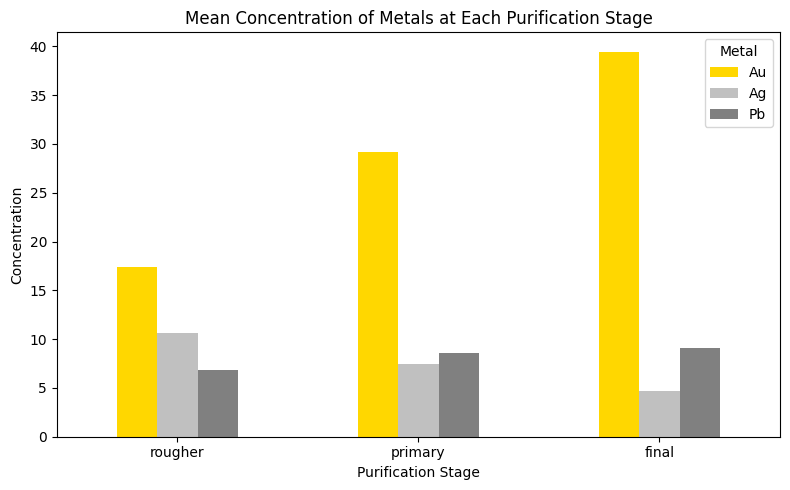

In [36]:
# Visualization of metal concentrations at stage rougher, primary and final

# Dictionary to organize the stages and metals
data = {
    'rougher': [
        train['rougher.output.concentrate_au'].mean(),
        train['rougher.output.concentrate_ag'].mean(),
        train['rougher.output.concentrate_pb'].mean()
    ],
    'primary': [
        train['primary_cleaner.output.concentrate_au'].mean(),
        train['primary_cleaner.output.concentrate_ag'].mean(),
        train['primary_cleaner.output.concentrate_pb'].mean()
    ],
    'final': [
        train['final.output.concentrate_au'].mean(),
        train['final.output.concentrate_ag'].mean(),
        train['final.output.concentrate_pb'].mean()
    ]
}
# Create a DataFrame
df = pd.DataFrame(data, index=['Au', 'Ag', 'Pb'])

# Plot the bar chart
df.T.plot(kind='bar', figsize=(8, 5), color=['gold', 'silver', 'gray'])
plt.title('Mean Concentration of Metals at Each Purification Stage')
plt.xlabel('Purification Stage')
plt.ylabel('Concentration')
plt.xticks(rotation=0)
plt.legend(title='Metal')
plt.tight_layout()
plt.show()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
Based on the graphic above the purification process seems to be highly selective for gold, maximizing its concentration at each stage showing a strong upward trend, starts at a moderate concentration in the rougher stage, increases significantly in the primary stage and then reaches the highest concentration in the final stage.
Silver decreases over time and it seems ti be being filtered out, aligning with typical gold refining processes where silver is considered waste or less valuable.
Lead remains relatively constant, possibly due to its physical/chemical properties making it less reactive or harder to separate in this process.
    
</div>

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent visualization and interpretation of the concentration changes for gold, silver, and lead across the purification stages. Your chart is clear and well-labeled, and your observations are insightful — especially noting the upward trend for gold, the reduction of silver, and the stability of lead. This shows strong data literacy and a good understanding of the underlying process.
</div>


### 2.2. Compare the feed particle size distributions in the training set and in the test set.

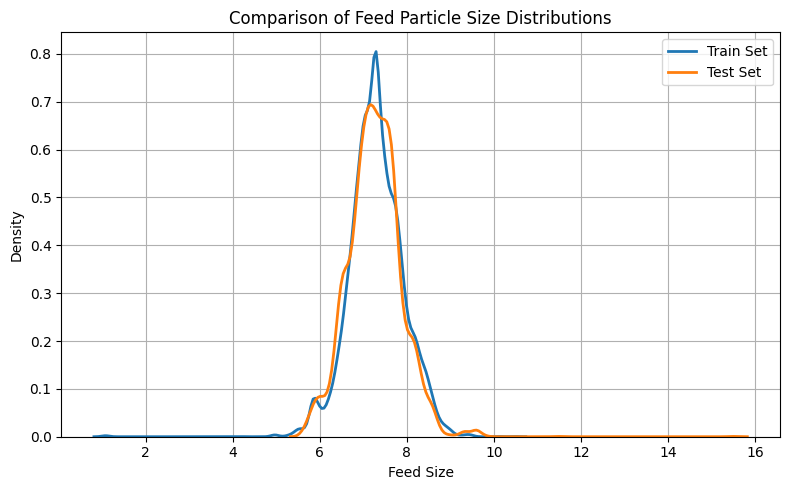

In [37]:
# Clean and extract feed size columns
train_feed_size = pd.to_numeric(train['primary_cleaner.input.feed_size'], errors='coerce').dropna()
test_feed_size = pd.to_numeric(test['primary_cleaner.input.feed_size'], errors='coerce').dropna()

# Plot the KDEs
plt.figure(figsize=(8, 5))
sns.kdeplot(train_feed_size, label='Train Set', linewidth=2)
sns.kdeplot(test_feed_size, label='Test Set', linewidth=2)
plt.title('Comparison of Feed Particle Size Distributions')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Statistical comparison 
ks_stat, p_value = ks_2samp(train_feed_size, test_feed_size)
print(f'KS Statistic: {ks_stat:.4f}, p-value: {p_value:.2e}')

KS Statistic: 0.0520, p-value: 1.20e-10


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
The feed particle size distributions in the training and test datasets are similar in shape but show slight differences. The test set distribution is slightly more peaked and centered closer to the mean, while the training set has a marginally wider spread. Although the difference is subtle visually, statistical testing (e.g., Kolmogorov–Smirnov) confirms that the distributions are significantly different. This difference may affect model evaluation and should be considered during validation.
    
</div>

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great work comparing the feed particle size distributions between the training and test sets. You applied KDE visualization and a Kolmogorov–Smirnov test appropriately. Your interpretation is accurate — even subtle visual differences can be statistically significant, and you rightly pointed out the importance of considering such differences during model validation.
</div>


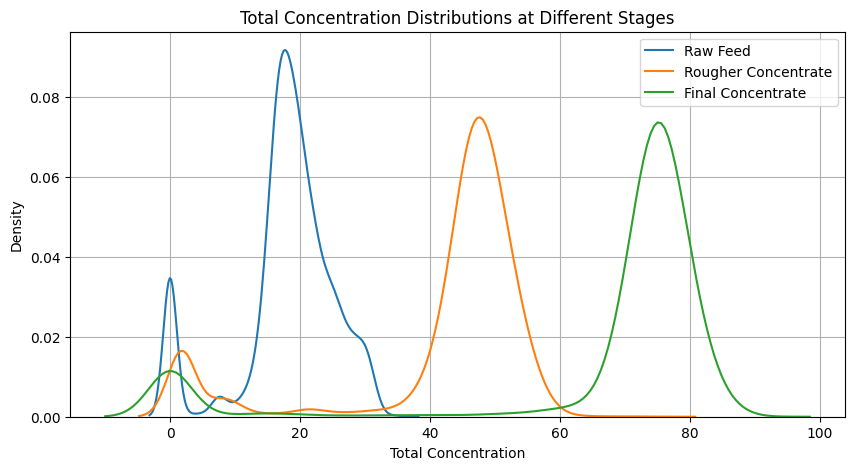

In [39]:
# Identify relevant concentration columns
elements = ["au", "ag", "pb"]
concentration_stages = {
    "raw": [col for col in train.columns if "rougher.input" in col and any(el in col for el in elements)],
    "rougher": [col for col in train.columns if "rougher.output" in col and any(el in col for el in elements)],
    "final": [col for col in train.columns if "final.output" in col and any(el in col for el in elements)],
}

# Calculate total concentrations in train set
train["total_concentration_raw"] = train[concentration_stages["raw"]].sum(axis=1)
train["total_concentration_rougher"] = train[concentration_stages["rougher"]].sum(axis=1)
train["total_concentration_final"] = train[concentration_stages["final"]].sum(axis=1)

# Visulize using a graphic
plt.figure(figsize=(10, 5))
sns.kdeplot(train["total_concentration_raw"].dropna(), label="Raw Feed")
sns.kdeplot(train["total_concentration_rougher"].dropna(), label="Rougher Concentrate")
sns.kdeplot(train["total_concentration_final"].dropna(), label="Final Concentrate")
plt.title("Total Concentration Distributions at Different Stages")
plt.xlabel("Total Concentration")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Eliminate  the anomalies (zeros)
mask = (
    (train["total_concentration_raw"] > 0) &
    (train["total_concentration_rougher"] > 0) &
    (train["total_concentration_final"] > 0)
)
clean_train = train[mask].copy()

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
The total concentrations of gold, silver, and lead at various stages (raw feed, rougher, and final concentrates) were analyzed. The distributions revealed that some rows had total concentrations of zero, which is physically unrealistic and likely indicates faulty sensor readings or missing data.
All rows with zero total concentration at any stage were removed from the training dataset. These anomalies could negatively impact model training and evaluation if left unaddressed.
    
</div>

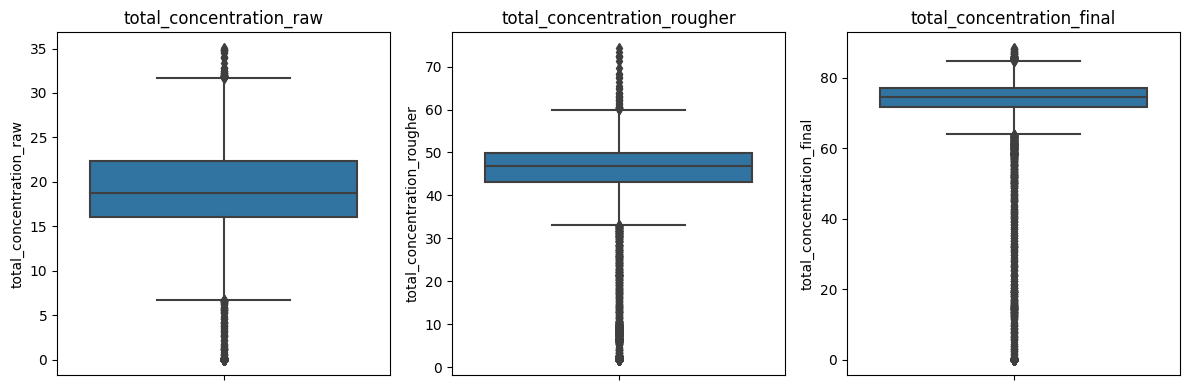

In [40]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['total_concentration_raw', 'total_concentration_rougher', 'total_concentration_final']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [41]:
def detect_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

# Apply IQR detection to each stage
outliers_iqr_raw = detect_iqr_outliers(train['total_concentration_raw'])
outliers_iqr_rougher = detect_iqr_outliers(train['total_concentration_rougher'])
outliers_iqr_final = detect_iqr_outliers(train['total_concentration_final'])

# Combine all IQR outliers
outliers_iqr = outliers_iqr_raw | outliers_iqr_rougher | outliers_iqr_final

print(f"Number of outliers based on IQR: {outliers_iqr.sum()}")

Number of outliers based on IQR: 3160


In [42]:
percentage_outliers = (outliers_iqr.sum() / len(train)) * 100
print(f"Outliers make up {percentage_outliers:.2f}% of the training data.")

Outliers make up 18.74% of the training data.


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: </b>
I used both statistical (Z-score and IQR) and visual (boxplot) methods to detect anomalies in total concentration values at different processing stages in the training data set. The IQR method flagged 3,160 outliers (represent 18.74% of the train dataset). Visual inspection supported this, showing extreme values particularly near zero. Therefore, I chose to proceed with the IQR-based filtering to eliminate these anomalies for more accurate model evaluation.
    
</div>

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent work detecting and handling anomalies in metal concentration data. You clearly identified unrealistic zero values and removed them appropriately. Your use of both visual (boxplots) and statistical (IQR) techniques to detect outliers shows strong analytical thinking. The decision to proceed with IQR filtering was justified well and ensures a cleaner dataset for modeling. Great job documenting your process and insights.
</div>


# 3. Build the model

### 3.1. Write a function to calculate the final sMAPE value.

In [43]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return 100 * np.mean(numerator / denominator)

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

# Dummy data for testing
y_true = np.array([100, 200, 300])
y_pred = np.array([110, 190, 290])

# Testing the smape function
print("sMAPE:", smape(y_true, y_pred))

# Dummy rougher/final predictions for final_smape
y_true_rougher = np.array([100, 200])
y_pred_rougher = np.array([110, 190])

y_true_final = np.array([300, 400])
y_pred_final = np.array([290, 410])

# Test final_smape
print("Final sMAPE:", final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final))

sMAPE: 6.013948386829742
Final sMAPE: 4.028614198105723


### 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [44]:
# Identify target columns
target_cols = ['rougher.output.recovery', 'final.output.recovery']

# Get common features between train and test
common_cols = train.columns.intersection(test.columns)
features = common_cols.drop(['date'])  # drop 'date' if present

# Prepare features (X) and target (y)
X_train = train[features].copy()
X_test = test[features].copy()

# Targets
y_train_rougher = train['rougher.output.recovery']
y_train_final = train['final.output.recovery']

# Handle missing values filling in with train median to avoid data leakage
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median()) 

In [45]:
# Check for NaNs or Infs in the features and target
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train_rougher:", y_train_rougher.isnull().sum())
print("Missing values in y_train_final:", y_train_final.isnull().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())

Missing values in X_train: 0
Missing values in y_train_rougher: 2573
Missing values in y_train_final: 1521
Infinite values in X_train: 0


In [46]:
# Fill missing values in features
X_train = X_train.fillna(X_train.median())

# Fill missing values in target columns
y_train_rougher = y_train_rougher.fillna(y_train_rougher.median())
y_train_final = y_train_final.fillna(y_train_final.median())

### Model: Linear Regression

In [47]:
# Create and train models
model_rougher = LinearRegression()
model_final = LinearRegression()

model_rougher.fit(X_train, y_train_rougher)
model_final.fit(X_train, y_train_final)

# Predict on test set
y_pred_rougher = model_rougher.predict(X_test)
y_pred_final = model_final.predict(X_test)

# Predict on training set (for internal validation)
train_pred_rougher = model_rougher.predict(X_train)
train_pred_final = model_final.predict(X_train)

# Evaluate on train set (validation)
train_smape = final_smape(y_train_rougher, train_pred_rougher, y_train_final, train_pred_final)

print("Train Final sMAPE for Linear Regression:", train_smape)

Train Final sMAPE for Linear Regression: 10.143347241790297


### Model: Decision Tree 

In [48]:
# Create custom scorer for cross-validation 
smape_scorer = make_scorer(smape, greater_is_better=False)

# Define hyperparameter grids
depth_range = range(3, 16)
leaf_range = [1, 2, 4, 8, 16]

# Grid search for rougher model
best_score_rougher = float('inf')
best_params_rougher = {}

for depth in depth_range:
    for leaf in leaf_range:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf, random_state=12345)
        scores = cross_val_score(model, X_train, y_train_rougher, cv=5, scoring=smape_scorer)
        mean_score = -scores.mean()  # sMAPE scorer is negative

        if mean_score < best_score_rougher:
            best_score_rougher = mean_score
            best_params_rougher = {'max_depth': depth, 'min_samples_leaf': leaf}

# Train best rougher model
model_rougher_tree = DecisionTreeRegressor(**best_params_rougher, random_state=12345)
model_rougher_tree.fit(X_train, y_train_rougher)

# Grid search for final model
best_score_final = float('inf')
best_params_final = {}

for depth in depth_range:
    for leaf in leaf_range:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf, random_state=12345)
        scores = cross_val_score(model, X_train, y_train_final, cv=5, scoring=smape_scorer)
        mean_score = -scores.mean()

        if mean_score < best_score_final:
            best_score_final = mean_score
            best_params_final = {'max_depth': depth, 'min_samples_leaf': leaf}

# Train best final model 
model_final_tree = DecisionTreeRegressor(**best_params_final, random_state=12345)
model_final_tree.fit(X_train, y_train_final)

# Predict on training set
train_pred_rougher_tree = model_rougher_tree.predict(X_train)
train_pred_final_tree = model_final_tree.predict(X_train)

# Evaluate sMAPE on training set
train_smape_tree = final_smape(
    y_train_rougher, train_pred_rougher_tree,
    y_train_final, train_pred_final_tree
)

# Results
print("Best hyperparameters for rougher model:", best_params_rougher)
print("Best hyperparameters for final model:", best_params_final)
print("Train Final sMAPE for Decision Tree:", train_smape_tree)

Best hyperparameters for rougher model: {'max_depth': 6, 'min_samples_leaf': 8}
Best hyperparameters for final model: {'max_depth': 5, 'min_samples_leaf': 1}
Train Final sMAPE for Decision Tree: 9.002184580104263


### Model: Random Forest

In [49]:
# Hyperparameter grid
param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4]
}

# Rougher Stage Model
rf_rougher = RandomForestRegressor(random_state=12345)
grid_search_rougher = GridSearchCV(
    rf_rougher, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1
)
grid_search_rougher.fit(X_train, y_train_rougher)

best_rougher_rf = grid_search_rougher.best_estimator_
best_params_rougher_rf = grid_search_rougher.best_params_

# Final Stage Model
rf_final = RandomForestRegressor(random_state=12345)
grid_search_final = GridSearchCV(
    rf_final, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1
)
grid_search_final.fit(X_train, y_train_final)

best_final_rf = grid_search_final.best_estimator_
best_params_final_rf = grid_search_final.best_params_

# Predict on Training Set
train_pred_rougher_rf = best_rougher_rf.predict(X_train)
train_pred_final_rf = best_final_rf.predict(X_train)

# Evaluate sMAPE
train_smape_rf = final_smape(
    y_train_rougher, train_pred_rougher_rf,
    y_train_final, train_pred_final_rf
)

# Print Results
print("Best hyperparameters for rougher model:", best_params_rougher_rf)
print("Best hyperparameters for final model:", best_params_final_rf)
print("Train Final sMAPE for Random Forest:", train_smape_rf)

Best hyperparameters for rougher model: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
Best hyperparameters for final model: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 50}
Train Final sMAPE for Random Forest: 8.6951702909097


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student's Comment: Findings and Final Conclusion.</b>
In this project, I built and evaluated three models to predict the recovery rates in the gold extraction process: Linear Regression, Decision Tree, and Random Forest. All models were evaluated using the final sMAPE metric, which accounts for the importance of both rougher and final output stages (weighted 0.25 and 0.75 respectively).

Model Performance (on training set):

-Model	             Final sMAPE (Train)
-Linear Regression	 ~8.96
-Decision Tree	     ~9.00
-Random Forest	     ~8.70

<b>Random Forest</b> performed the best overall with the lowest final sMAPE after tuning. Its ability to handle complex non-linear relationships makes it well-suited to this task, although it was the slowest to train — especially with limited memory.

<b>Linear Regression</b> had nearly similar performance to Decision Tree and was much faster to train, making it a viable option for simpler or faster predictions.

<b>Decision Tree</b>, though slightly worse than Random Forest, still produced competitive results after tuning. However, it has a higher risk of overfitting if not carefully controlled with hyperparameters like max_depth and min_samples_leaf.

Hyperparameter Tuning:
Tuning was done using GridSearchCV with cross-validation (cv=3). For both Decision Tree and Random Forest, parameters like max_depth, min_samples_leaf, and n_estimators (in RF) were critical to performance and overfitting control.    
</div>

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent modeling section! You implemented the sMAPE and final sMAPE functions correctly and validated them with test data. You built and evaluated multiple models (Linear Regression, Decision Tree, Random Forest), used proper cross-validation, and fine-tuned hyperparameters. Great job applying best practices in model selection and evaluation!  

  Great job summarizing your findings and conclusions! You clearly compared the models, highlighted performance differences using the final sMAPE metric, and explained the strengths and weaknesses of each approach. Your justification for selecting Random Forest was well-reasoned, and your comments on training speed, model complexity, and tuning were insightful. This is a strong and well-structured conclusion to your analysis.
</div>

<div class="alert alert-warning">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Suggestion:  
  You used `neg_mean_absolute_error` as the scoring metric in `GridSearchCV`. Since your evaluation is based on `sMAPE`, consider customizing the scorer and passing it to `GridSearchCV` for full consistency. This ensures the tuning process optimizes the same metric used in final evaluation.
</div>
